In [34]:
8*7


56

In [35]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [36]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [31]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=5

In [32]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE   
)

Found 2152 files belonging to 3 classes.


In [33]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [34]:
len(dataset)

68

In [35]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[197. 201. 210.]
  [184. 188. 197.]
  [186. 190. 199.]
  ...
  [121. 123. 135.]
  [135. 137. 149.]
  [140. 142. 154.]]

 [[199. 203. 212.]
  [191. 195. 204.]
  [194. 198. 207.]
  ...
  [130. 132. 144.]
  [134. 136. 148.]
  [130. 132. 144.]]

 [[198. 202. 211.]
  [197. 201. 210.]
  [200. 204. 213.]
  ...
  [143. 145. 157.]
  [141. 143. 155.]
  [132. 134. 146.]]

 ...

 [[171. 173. 186.]
  [171. 173. 186.]
  [167. 169. 182.]
  ...
  [147. 149. 161.]
  [145. 147. 159.]
  [141. 143. 155.]]

 [[169. 171. 184.]
  [171. 173. 186.]
  [169. 171. 184.]
  ...
  [136. 138. 150.]
  [124. 126. 138.]
  [119. 121. 133.]]

 [[169. 171. 184.]
  [174. 176. 189.]
  [174. 176. 189.]
  ...
  [137. 139. 151.]
  [140. 142. 154.]
  [149. 151. 163.]]]


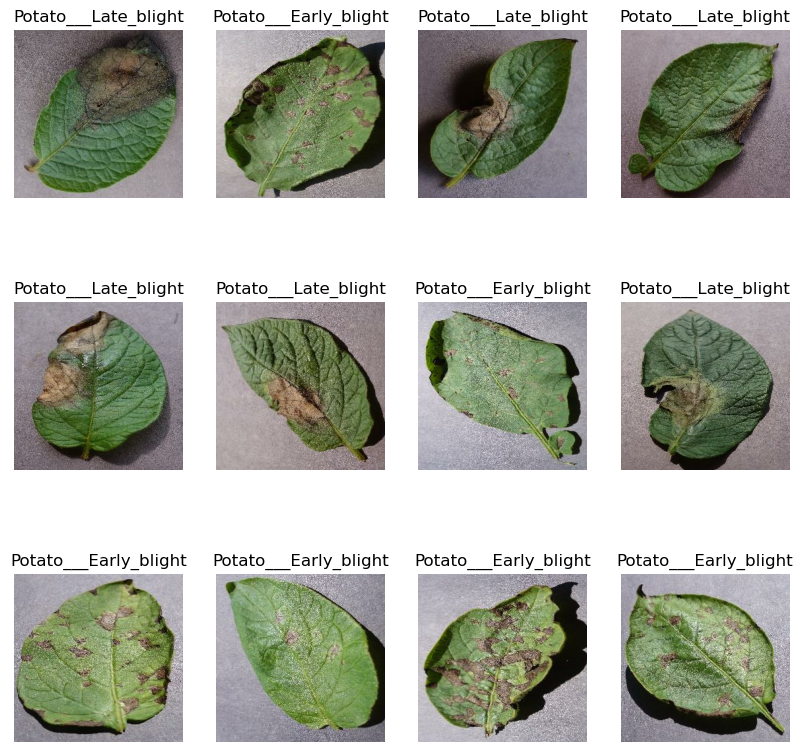

In [37]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [38]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [39]:
train_ds=dataset.take(54)
len(train_ds)

54

In [40]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [41]:
val_size=0.1
len(dataset)*0.1

6.800000000000001

In [42]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [43]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [44]:
 def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
        ds_size=len(ds)
        if shuffle:
            ds=ds.shuffle(shuffle_size,seed=12)
        train_size=int(train_split*ds_size)
        val_size=int(val_split*ds_size)
        
        train_ds=ds.take(train_size)
        val_ds=ds.skip(train_size).take(val_size)
        test_ds=ds.skip(train_size).skip(val_size)
        
        return train_ds,val_ds,test_ds

In [45]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [46]:
len(train_ds)

54

In [47]:
len(val_ds)

6

In [48]:
len(test_ds)

8

In [49]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [50]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [51]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [52]:
n_classes=3

In [53]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [55]:
model.compile(
optimizer="adam",
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=["accuracy"])

In [56]:
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds
)
         

Epoch 1/5
54/54 [==============================] - 207s 3s/step - loss: 0.9120 - accuracy: 0.5069 - val_loss: 0.8569 - val_accuracy: 0.6302
Epoch 2/5
54/54 [==============================] - 227s 4s/step - loss: 0.6642 - accuracy: 0.7164 - val_loss: 0.5624 - val_accuracy: 0.7760
Epoch 3/5
54/54 [==============================] - 177s 3s/step - loss: 0.5455 - accuracy: 0.7778 - val_loss: 0.4881 - val_accuracy: 0.8333
Epoch 4/5
54/54 [==============================] - 170s 3s/step - loss: 0.4520 - accuracy: 0.8247 - val_loss: 0.3336 - val_accuracy: 0.8594
Epoch 5/5
54/54 [==============================] - 150s 3s/step - loss: 0.3499 - accuracy: 0.8553 - val_loss: 0.2995 - val_accuracy: 0.8750


In [27]:
 acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss=history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'training and validation loss')

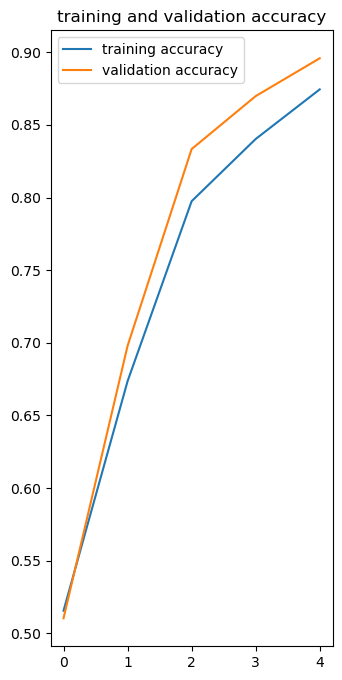

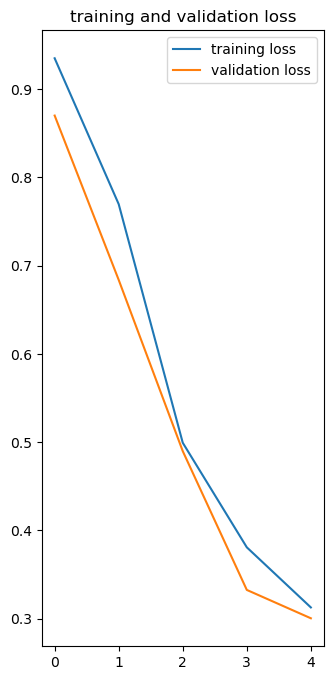

In [29]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="training accuracy")
plt.plot(range(EPOCHS),val_acc,label="validation accuracy")
plt.legend()
plt.title("training and validation accuracy")

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="training loss")
plt.plot(range(EPOCHS),val_loss,label="validation loss")
plt.legend()
plt.title("training and validation loss")



In [58]:
import numpy as np

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 657ms/step
predicted label: Potato___Late_blight


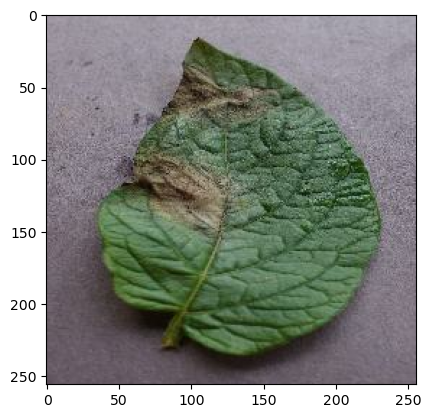

In [59]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [64]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    
    return predicted_class,confidence

1/1 [==============================] - 0s 50ms/step


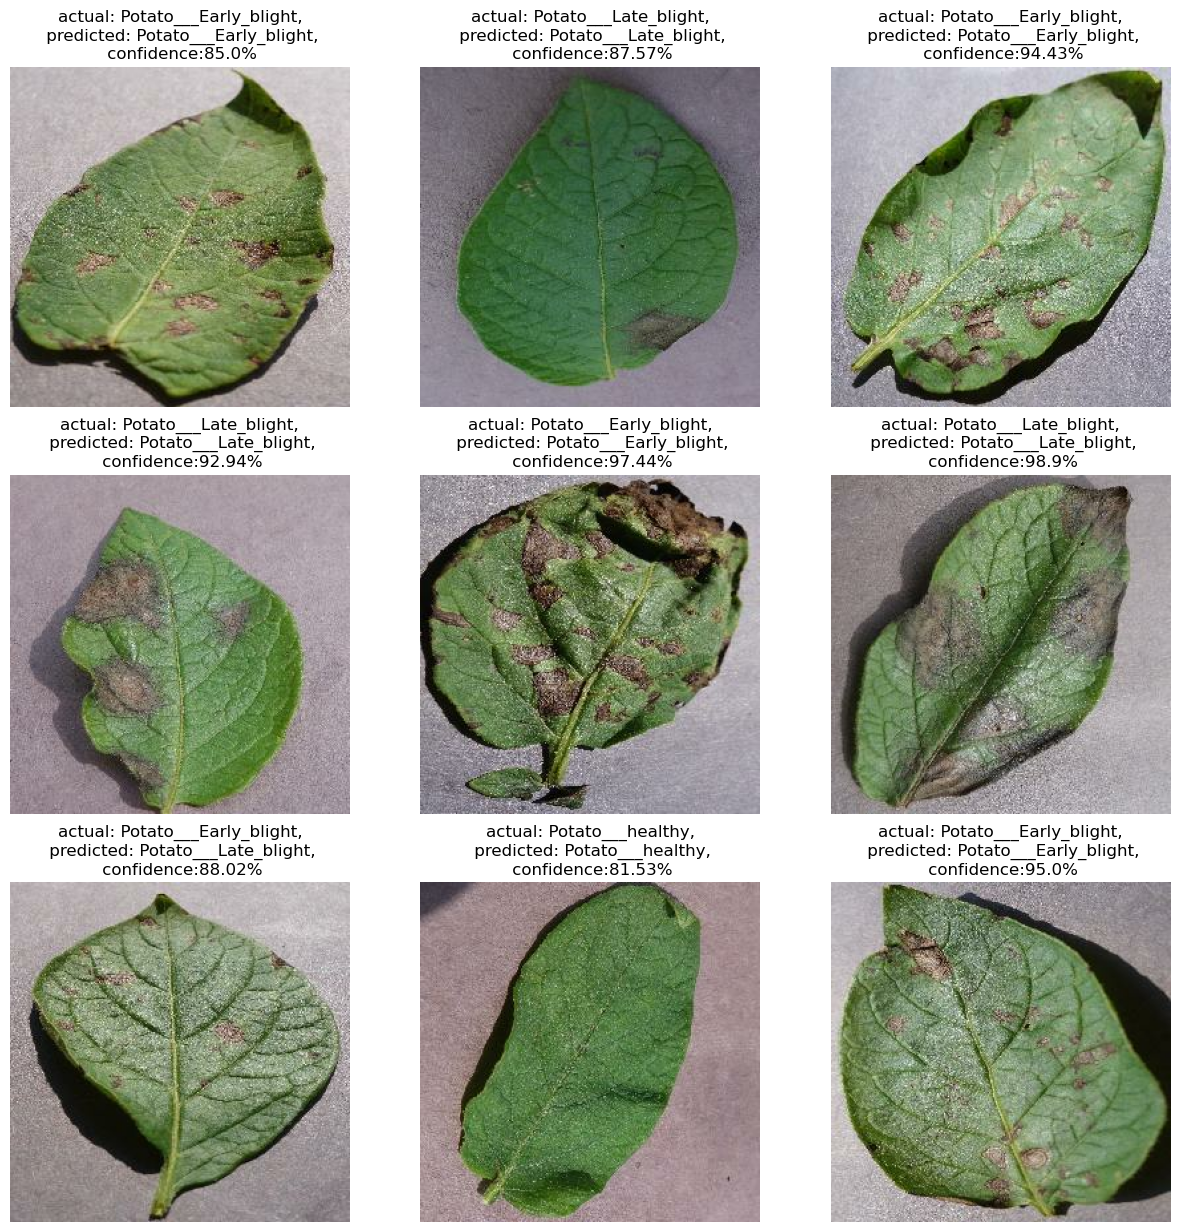

In [66]:
plt.figure(figsize=(15,15))
for images,lables in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[lables[i]]
        plt.title(f"actual: {actual_class},\n predicted: {predicted_class},\n confidence:{confidence}%")
        plt.axis("off")
        

In [67]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
